In [211]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [212]:


def plot_stock_prediction(y_pred, y_test,stock_name, acciones_reales):
    """
    Evaluates the model on the test set and returns the predictions.
    """ 
    path='../data/raw/{stock_name}_with_SP500.csv'
    data_test_with_date = pd.read_csv(path.format(stock_name=stock_name))
    data_test_with_date = data_test_with_date[data_test_with_date['Date'] >= '2025-03-01']
    data_test_with_date = data_test_with_date[data_test_with_date['Date'] <= '2025-03-31']
    
    

    # Métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  
    print(f"MSE: {mse}")
    print(f"R2: {r2}")

    print(f"Predicciones positivas reales: {np.sum(y_test > 0)}")
    print(f"Predicciones positivas predichas: {np.sum(y_pred > 0)}")

    print(f"Predicciones negativas reales: {np.sum(y_test < 0)}")
    print(f"Predicciones negativas predichas: {np.sum(y_pred < 0)}")

    accuracy = np.sum((y_test > 0) & (y_pred > 0)) + np.sum((y_test < 0) & (y_pred < 0))
    accuracy = accuracy / len(y_test)
    print(f"Accuracy: {accuracy}")

    # Crear un DataFrame con fechas y valores reales y predichos
    result_df = pd.DataFrame({
        'Date': data_test_with_date['Date'].values[:len(y_test)],
        'Real': y_test.values,
        'Predicción': y_pred
    })

    # Convertir la columna de fecha a datetime
    result_df['Date'] = pd.to_datetime(result_df['Date'])

    # Graficar los valores reales y predichos a lo largo del tiempo
    plt.figure(figsize=(12, 6))
    plt.plot(result_df['Date'], result_df['Real'], label='Valores Reales', marker='o')
    plt.plot(result_df['Date'], result_df['Predicción'], label='Valores Predichos', marker='x')
    plt.xlabel('Fecha')
    plt.ylabel('Cambio Ratio')
    plt.title(f'Predicción vs Valores Reales de change ratio de {stock_name} - Marzo 2025')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #Como la predicción es diaria se puede sumar al valor 
    #real de cada dia el porcentaje de cambio predicho para ver como se comporta la acción en el tiempo. Con la finalidad
    #de reduccir los errores acumulados que daría una predicción de corrido en todo el mes.

    acciones_predichas =[acciones_reales[0]]
    for i in range(len(acciones_reales)-1):
        acciones_predichas.append(acciones_reales[i]*(1+y_pred[i]/100))
        # acciones_predichas.append(acciones_predichas[i]*(1+y_pred[i]/100))
        # print("Acciones reales anterior dia: ", acciones_reales[i])
        # print("Acciones predichas anterior dia: ", acciones_predichas[i])
        # print(y_pred[i])
        # print(y_test[i])
        # print("Predicción: ", acciones_predichas[i]*(1+y_pred[i]/100))
        # print('----------------')
    data_test_with_date2 = pd.read_csv(path.format(stock_name=stock_name))
    data_test_with_date2 = data_test_with_date2[data_test_with_date2['Date'] >= '2025-02-28']   
    
    #Gráfica de la acción con el porcentaje de cambio. 
    plt.figure(figsize=(12, 6))
    plt.plot(data_test_with_date2['Date'], acciones_reales, label='Valores Reales', marker='o')
    plt.plot(data_test_with_date2['Date'], acciones_predichas, label='Valores Predichos', marker='x')
    # plt.plot(data_test_with_date['Date'], acciones_predichas, label='Valores Predichos', marker='x')
    plt.xlabel('Fecha')
    plt.ylabel('Valor de la acción')
    plt.title(f'Predicción vs Valores Reales en acción de {stock_name} - Marzo 2025')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [213]:

#Cargar los datos de entrenamiento y splitearlos. Solamente se realiza este proceso para poder realizar el escalado ya que no se guardó la clase Scaler.
AAPL_train_val = pd.read_csv("../data/processed/AAPL_train.csv")
AMZN_train_val = pd.read_csv("../data/processed/AMZN_train.csv")
GOOGL_train_val = pd.read_csv("../data/processed/GOOGL_train.csv")
MSFT_train_val = pd.read_csv("../data/processed/MSFT_train.csv")
NVDA_train_val = pd.read_csv("../data/processed/NVDA_train.csv")
scaler_APPL = StandardScaler()
AAPL_train, AAPL_val  = train_test_split(AAPL_train_val, test_size=0.15, random_state=42, shuffle=True) 
AAPL_X_train = AAPL_train.drop(columns=['ChangeRatio'])
AAPL_X_train = scaler_APPL.fit_transform(AAPL_X_train)

scaler_AMZN = StandardScaler()
AMZN_train, AMZN_val  = train_test_split(AMZN_train_val, test_size=0.15, random_state=42, shuffle=True)
AMZN_X_train = AMZN_train.drop(columns=['ChangeRatio'])
AMZN_X_train = scaler_AMZN.fit_transform(AMZN_X_train)

scaler_GOOGL = StandardScaler()
GOOGL_train, GOOGL_val  = train_test_split(GOOGL_train_val, test_size=0.15, random_state=42, shuffle=True)
GOOGL_X_train = GOOGL_train.drop(columns=['ChangeRatio'])
GOOGL_X_train = scaler_GOOGL.fit_transform(GOOGL_X_train)

scaler_MSFT = StandardScaler()
MSFT_train, MSFT_val  = train_test_split(MSFT_train_val, test_size=0.15, random_state=42, shuffle=True)
MSFT_X_train = MSFT_train.drop(columns=['ChangeRatio'])
MSFT_X_train = scaler_MSFT.fit_transform(MSFT_X_train)

scaler_NVDA = StandardScaler()
NVDA_train, NVDA_val  = train_test_split(NVDA_train_val, test_size=0.15, random_state=42, shuffle=True)
NVDA_X_train = NVDA_train.drop(columns=['ChangeRatio'])
NVDA_X_train = scaler_NVDA.fit_transform(NVDA_X_train)

#Cargar los modelos para cada acción del modelo de prediccion y su respectivo modelo de PCA
nvidia_model=joblib.load('../models/saved_models/NVDA_best_model.pkl')
apple_model=joblib.load('../models/saved_models/AAPL_best_model.pkl')
amazon_model=joblib.load('../models/saved_models/AMZN_best_model.pkl')
google_model=joblib.load('../models/saved_models/GOOGL_best_model.pkl')
msft_model=joblib.load('../models/saved_models/MSFT_best_model.pkl')

nvidia_pca=joblib.load('../models/saved_models/NVDA_pca.pkl')
apple_pca=joblib.load('../models/saved_models/AAPL_pca.pkl')
amazon_pca=joblib.load('../models/saved_models/AMZN_pca.pkl')
google_pca=joblib.load('../models/saved_models/GOOGL_pca.pkl')
msft_pca=joblib.load('../models/saved_models/MSFT_pca.pkl')

In [214]:
#Cargar la data de marzo del 2025 para cada acción. 
#Ya en la práctica se tendría unicamente las features del día actual, por lo que se 
#haría una predicción cada día para cada acción y el feature engineering de la data de las acciones necesario para lograr esto. 
#Para el caso, se cargan todos los datos de una 
#sola vez para hacer la predicción de cada acción.
nvidia_test=pd.read_csv('../data/processed/NVDA_test.csv')
apple_test=pd.read_csv('../data/processed/AAPL_test.csv')
amazon_test=pd.read_csv('../data/processed/AMZN_test.csv')
google_test=pd.read_csv('../data/processed/GOOGL_test.csv')
msft_test=pd.read_csv('../data/processed/MSFT_test.csv')

#Cargar los valores reales de las acciones a lo largo del mes de marzo del 2025 para cada acción. 
#Serían los valores de 'Close_lag_1' de cada acción.
nvidia=pd.read_csv('../data/raw/NVDA_with_SP500.csv')
apple=pd.read_csv('../data/raw/AAPL_with_SP500.csv')
amazon=pd.read_csv('../data/raw/AMZN_with_SP500.csv')
google=pd.read_csv('../data/raw/GOOGL_with_SP500.csv')
msft=pd.read_csv('../data/raw/MSFT_with_SP500.csv')

nvidia_reales=nvidia['Close'].values[nvidia['Date'] >= '2025-02-28']
apple_reales=apple['Close'].values[apple['Date'] >= '2025-02-28']
amazon_reales=amazon['Close'].values[amazon['Date'] >= '2025-02-28']
google_reales=google['Close'].values[google['Date'] >= '2025-02-28']
msft_reales=msft['Close'].values[msft['Date'] >= '2025-02-28']

In [215]:
#Finalmente se escalan los datos. Se utiliza el modelo de PCA de cada acción para transformar los datos de cada acción.
#
nvidia_test_y= nvidia_test['ChangeRatio']
nvidia_test_X= nvidia_test.drop(columns=['ChangeRatio'])
nvidia_test_X= scaler_NVDA.transform(nvidia_test_X)
nvidia_test_X= nvidia_pca.transform(nvidia_test_X)

apple_test_y= apple_test['ChangeRatio']
apple_test_X= apple_test.drop(columns=['ChangeRatio'])
apple_test_X= scaler_APPL.transform(apple_test_X)
apple_test_X= apple_pca.transform(apple_test_X)


amazon_test_y= amazon_test['ChangeRatio']
amazon_test_X= amazon_test.drop(columns=['ChangeRatio'])
amazon_test_X= scaler_AMZN.transform(amazon_test_X)
amazon_test_X= amazon_pca.transform(amazon_test_X)


google_test_y= google_test['ChangeRatio']
google_test_X= google_test.drop(columns=['ChangeRatio'])
google_test_X= scaler_GOOGL.transform(google_test_X)
google_test_X= google_pca.transform(google_test_X)


msft_test_y= msft_test['ChangeRatio']
msft_test_X= msft_test.drop(columns=['ChangeRatio'])
msft_test_X= scaler_MSFT.transform(msft_test_X)
msft_test_X= msft_pca.transform(msft_test_X)


In [216]:
# #Generar las predicciones de cada accion para el mes de marzo del 2025
nvidia_pred=nvidia_model.predict(nvidia_test_X)
apple_pred=apple_model.predict(apple_test_X)
amazon_pred=amazon_model.predict(amazon_test_X)
google_pred=google_model.predict(google_test_X)
msft_pred=msft_model.predict(msft_test_X)

#Convertir a series para poder graficar
nvidia_pred=pd.Series(nvidia_pred)
apple_pred=pd.Series(apple_pred)
amazon_pred=pd.Series(amazon_pred)
google_pred=pd.Series(google_pred)
msft_pred=pd.Series(msft_pred)


MSE: 4.099896205350883
R2: -0.23144756916757325
Predicciones positivas reales: 9
Predicciones positivas predichas: 16
Predicciones negativas reales: 12
Predicciones negativas predichas: 5
Accuracy: 0.47619047619047616


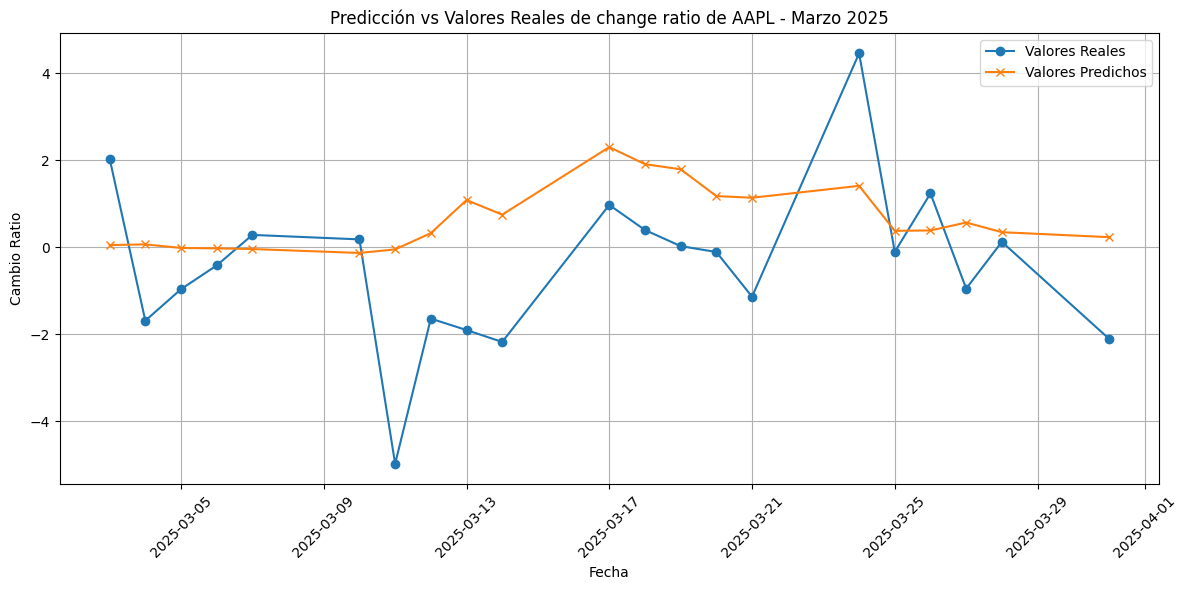

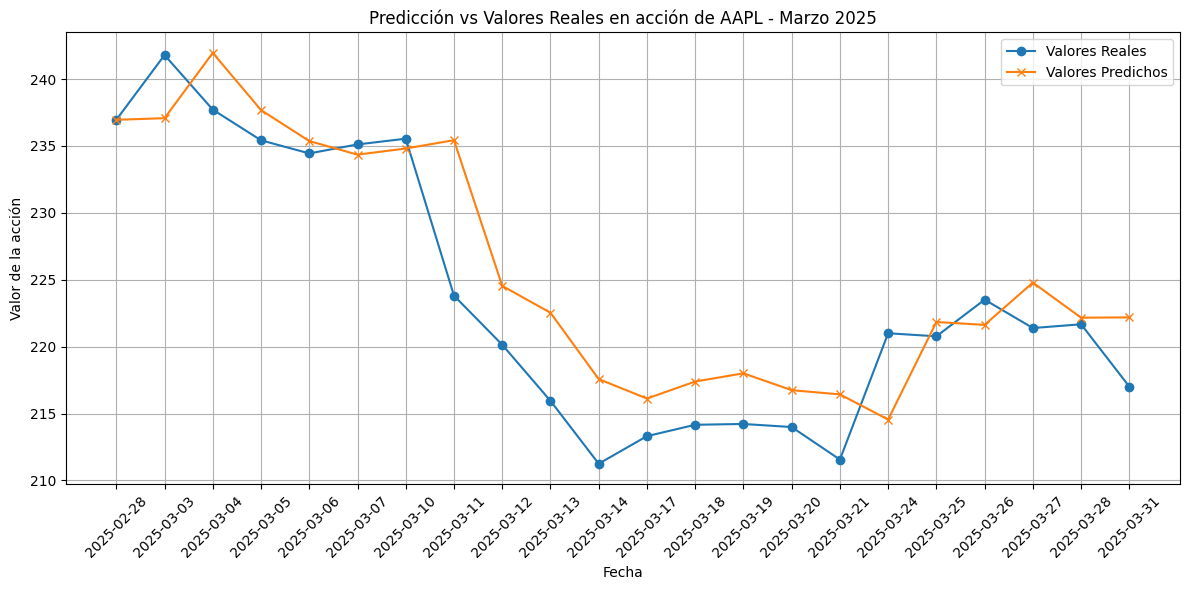

MSE: 6.650865786143377
R2: -0.06106159883219453
Predicciones positivas reales: 8
Predicciones positivas predichas: 17
Predicciones negativas reales: 13
Predicciones negativas predichas: 4
Accuracy: 0.2857142857142857


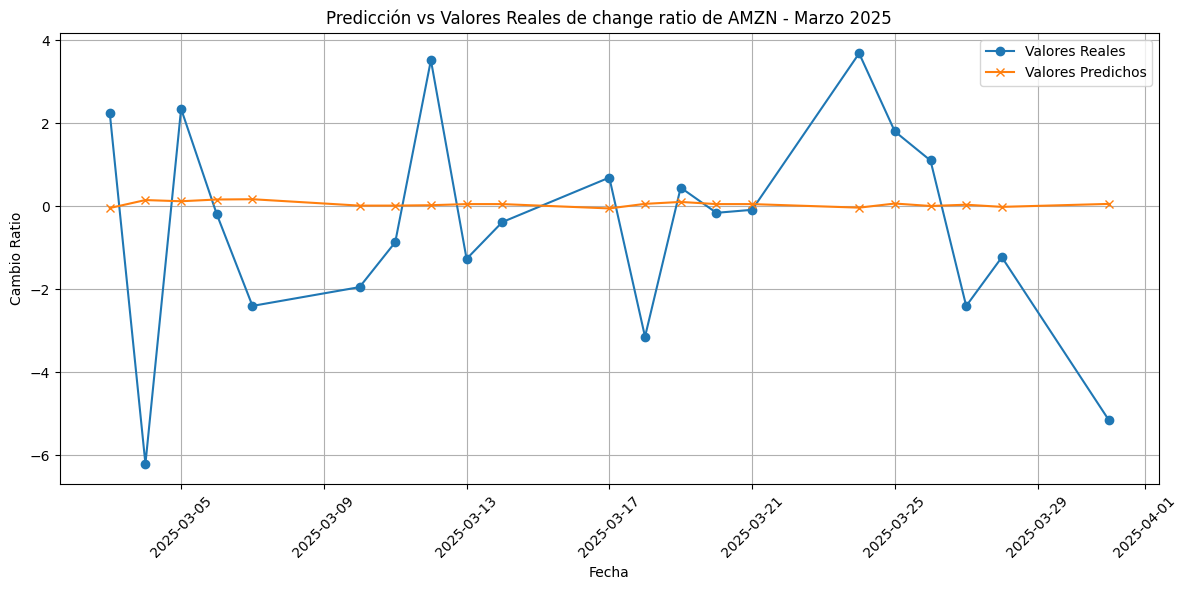

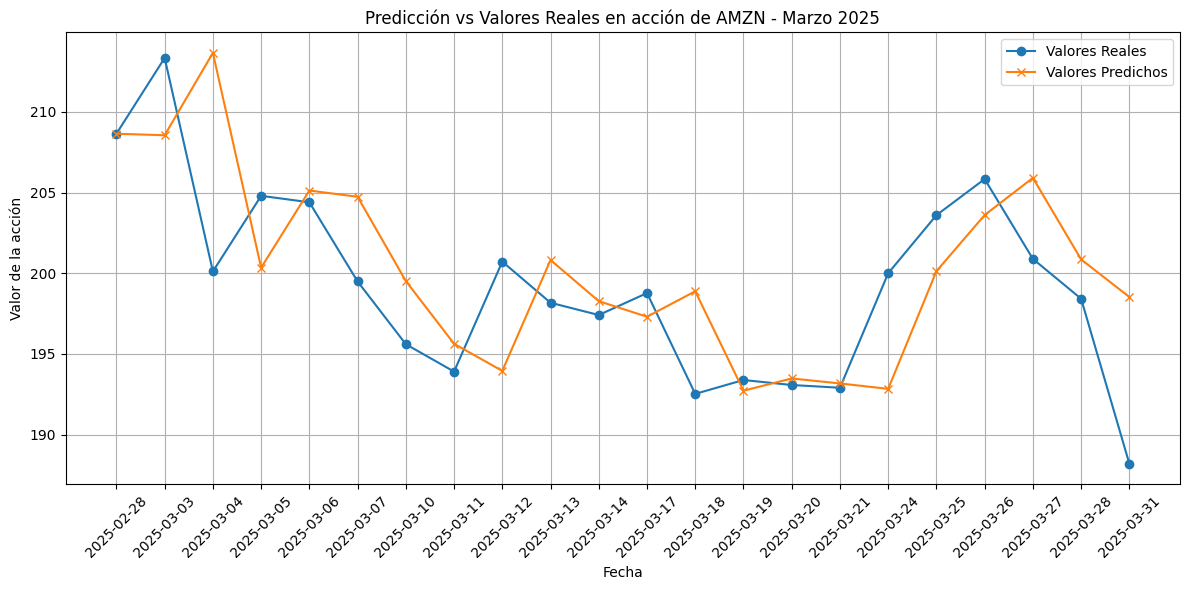

MSE: 3.9316668176853953
R2: -0.032024655800445556
Predicciones positivas reales: 9
Predicciones positivas predichas: 19
Predicciones negativas reales: 12
Predicciones negativas predichas: 2
Accuracy: 0.42857142857142855


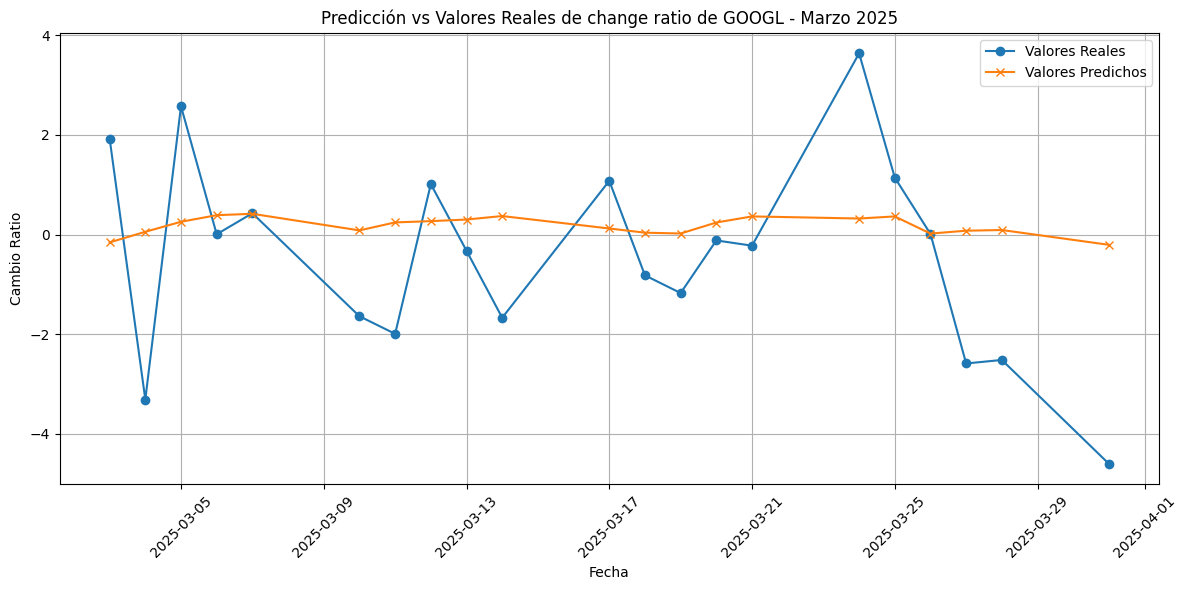

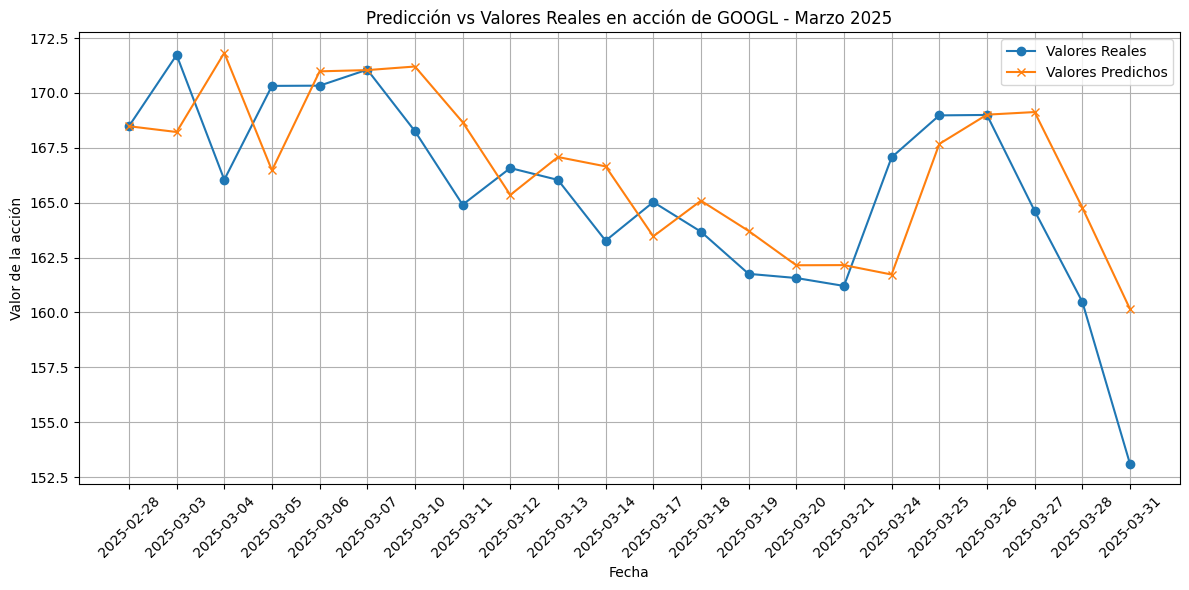

MSE: 2.8976237144816297
R2: -0.00905068786254315
Predicciones positivas reales: 10
Predicciones positivas predichas: 8
Predicciones negativas reales: 11
Predicciones negativas predichas: 13
Accuracy: 0.6190476190476191


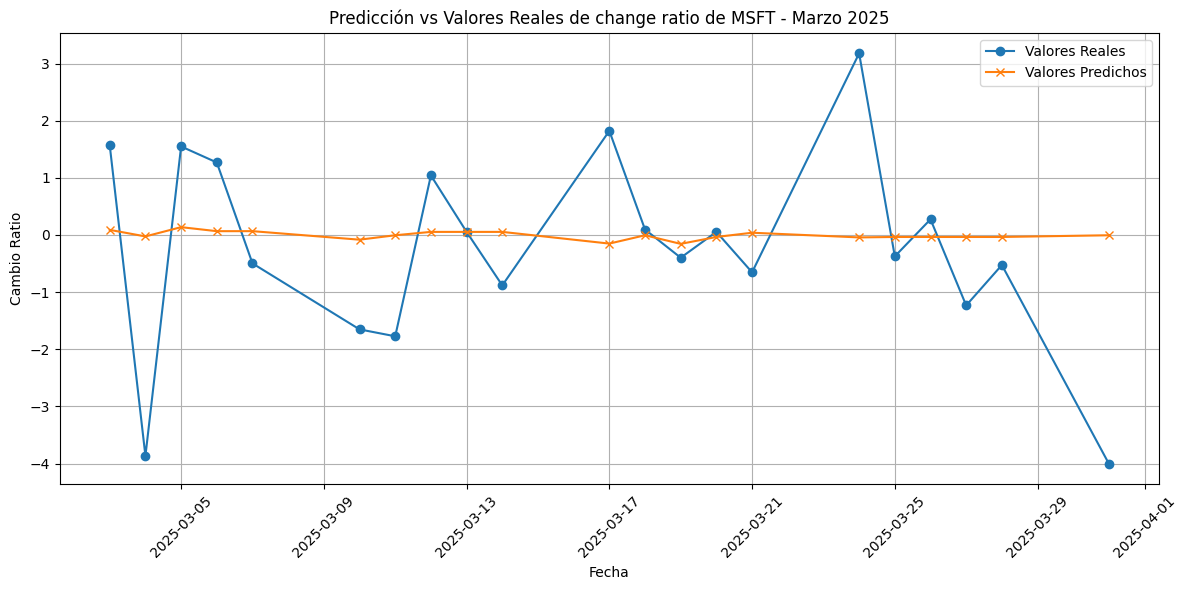

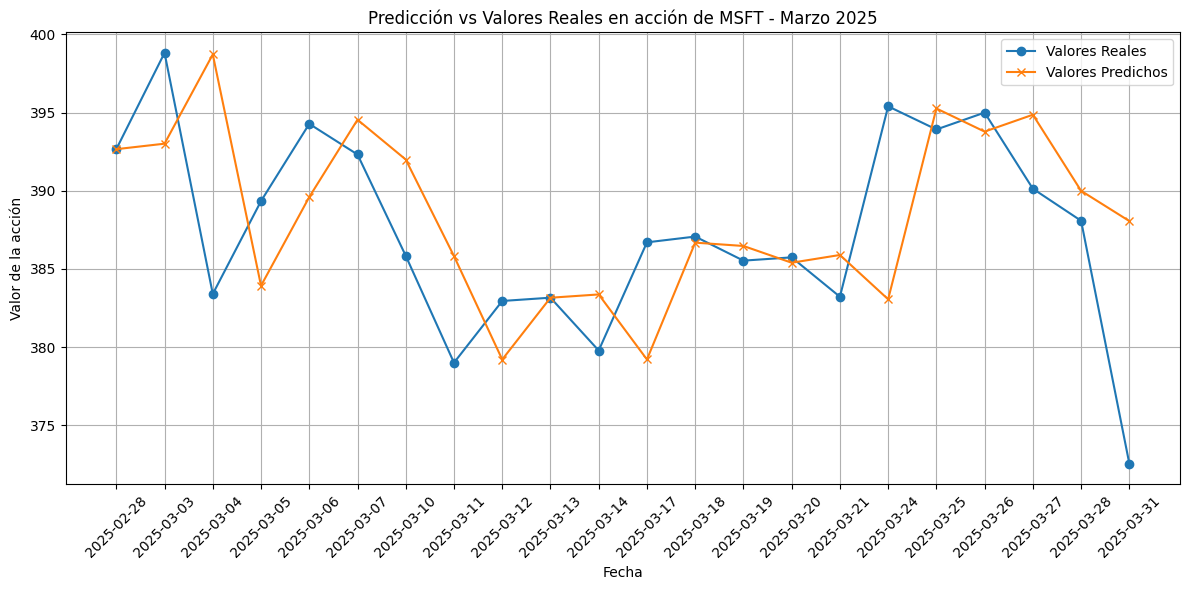

MSE: 16.04957487832116
R2: 0.0370705631928302
Predicciones positivas reales: 10
Predicciones positivas predichas: 15
Predicciones negativas reales: 11
Predicciones negativas predichas: 6
Accuracy: 0.5714285714285714


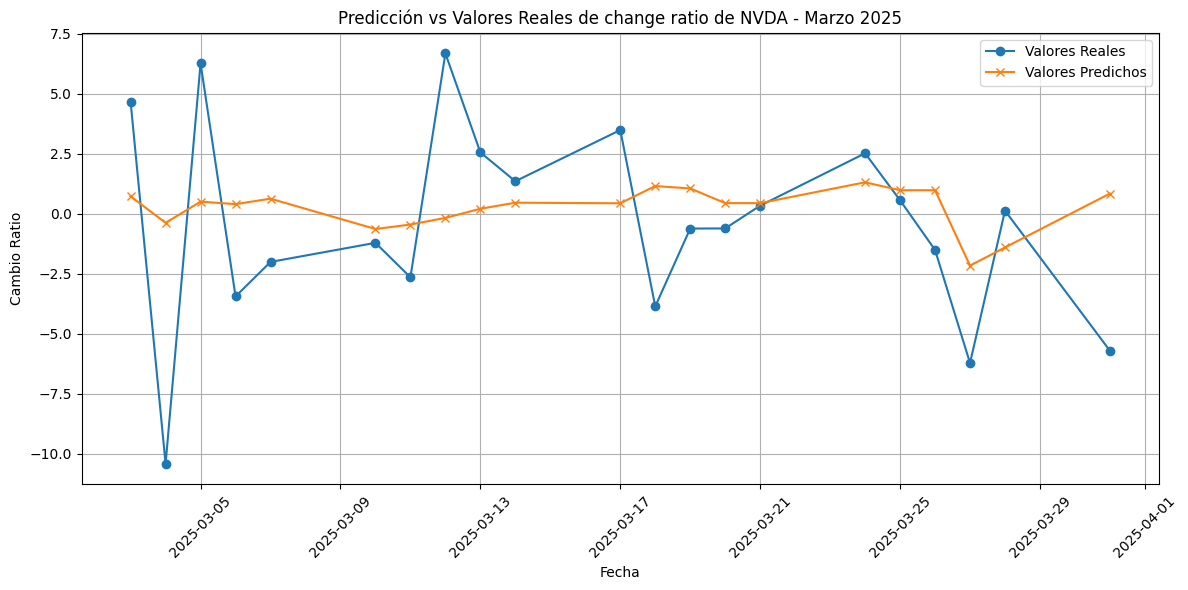

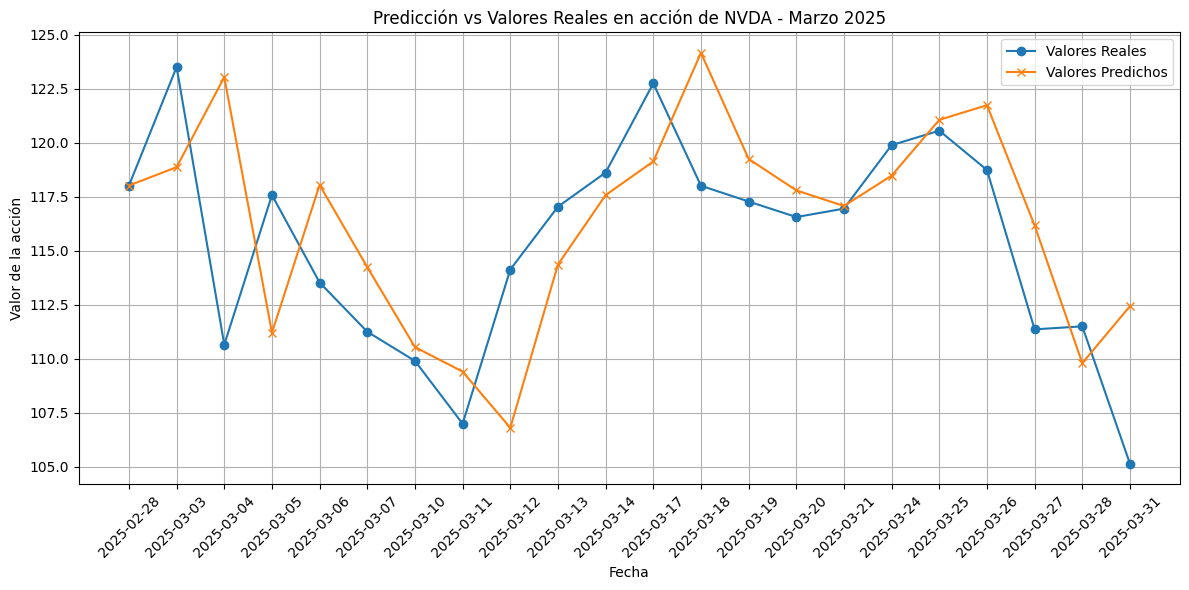

In [217]:
#Acción de Apple
plot_stock_prediction(apple_pred, apple_test_y, 'AAPL', apple_reales)
#Acción de Amazon
plot_stock_prediction(amazon_pred, amazon_test_y, 'AMZN', amazon_reales)
#Acción de Google
plot_stock_prediction(google_pred, google_test_y, 'GOOGL', google_reales)
#Acción de Microsoft
plot_stock_prediction(msft_pred, msft_test_y, 'MSFT', msft_reales)
#Acción de Nvidia
plot_stock_prediction(nvidia_pred, nvidia_test_y, 'NVDA', nvidia_reales)

In [218]:
# import random
# import numpy as np

# #Lógica de inversiones, se plantea una inversión al inicio de cada día durante el mes de marzo.
# #La inversión o retiro de cada día dependerá de la predicción del modelo referente a la tendencia de la ETF al final de ese día.

# #Se inicia el proceso un día antes del primer día de marzo (fehca de inicio de la inversión).
# #Se busca el estado actual de cada ETF para el 31 de marzo, una vez cerrada la bolsa.

# #Se inicializan 31 valores para cada ETF, que representan el valor de cada ETF al final de cada día o al inicio del siguiente día.
# #Para esta simulación representarían los valores de ETF al inicio de cada día del mes de marzo.

# cambiosPorcentuales=[[random.uniform(-0.05, 0.05) for _ in range(31)] for _ in range(5)]
# #Gráfica de valores de cada ETF a lo largo del mes de marzo.
# import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[0][i] for i in range(31)], label='ETF 1')
# plt.title('Cambios porcentuales del ETF 1 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[1][i] for i in range(31)], label='ETF 2')
# plt.title('Cambios porcentuales del ETF 2 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[2][i] for i in range(31)], label='ETF 3')
# plt.title('Cambios porcentuales del ETF 3 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[3][i] for i in range(31)], label='ETF 4')
# plt.title('Cambios porcentuales del ETF 4 a lo largo del mes de marzo')

# plt.figure(figsize=(5, 5))
# plt.plot(range(1, 32), [cambiosPorcentuales[4][i] for i in range(31)], label='ETF 5')
# plt.title('Cambios porcentuales del ETF 5 a lo largo del mes de marzo')



In [219]:
#Funciones para calcular ganancias por medio de tranformaciones de dinero a acciones y viceversa.
def money_to_action(money, actual_action_value):
    """
    Función que convierte el dinero a acciones.
    :param money: dinero a convertir
    :param actual_action_value: valor de la acción en ese momento
    :return: número de acciones redondeado a 4 decimales
    """
    try:
        valor=round(money / actual_action_value, 4)
        return valor
    except ZeroDivisionError:
        return 0


def action_to_money(actions, actual_action_value):
    """
    Función que convierte las acciones a dinero.
    :param actions: número de acciones
    :param actual_action_value: valor de la acción en ese momento
    :return: dinero redondeado a 2 decimales
    """
    return round(actions * actual_action_value, 2)


In [220]:
# #Se inicia el proceso de inversión, sabiendo el cambio porcentual de cada ETF respecto al día anterior (la y que actualmente se predice
# # en el modelo).
# #Si el ETF presentó una disminución en su valor se retira una inversión equivalente al total de cartera sobre 1,5 veces el porcentaje 
# # del cambio porcentual.
# #actual invertido en la ETF. Si actualmente no se tiene acciones de la ETF, se inverte un 10% del total de la cartera en caso 
# #de que el cambio porcentual sea practicamente nulo y un 1% del total de la cartera en caso de que el cambio porcentual sea menor que el -100%.

# #Si el ETF presentó un aumento en su valor se invierte una cantidad equivalente 
# # al porcentaje del cambio porcentual respecto al total actual en la cartera.
# #Si actualmente no se tiene acciones en la ETF, se invierte un capital equivalente a 2 veces el 
# # porcentaje del cambio porcentual respecto al total actual en la cartera.
# #Si se predice un aumento de acciones del ETF sobrepasa el umbral del 40% (cambio porcentual), se invierte el capital equivalente a 2 veces 
# # el porcentaje del cambio porcentual respecto al total actual en la cartera y se marca la ETF para el retiro del 75% de acciones al 
# #del día siguiente. Si se predice este aumento y también se tenía previsto el retiro de acciones, en su lugar se 
# #retira un 20% de acciones de la ETF, se deposita el capital equivalente al porcentaje del cambio porcentual respecto al total
# #actual en la cartera y se marca la ETF para el retiro del 75% de acciones al inicio del día siguiente.

# #Las inversiones que dependen del cambio porcentual tienen un máximo del 20% del total de la cartera actual para cuando el cambio porcentual es  positivo y
# #un máximo del 5% del total de la cartera actual para cuando el cambio porcentual es negativo.
# #Los retiros de acciones que estan bajando tiene un máximo del 90% del la acción actual en la ETF.

# #El orden es importante, primero se retiran acciones de las ETF marcadas para el retiro, luego se 
# #retiran acciones de las ETF que presentaron una disminución en su valor, luego se invierte
# #en las ETF de mayor umbral y aquellas que presentaron un aumento en su valor.
# #Y finalmente se invierte en las ETF cuyo valor disminuyó, pero esta inversión es pequeña.
# def dia_bolsa(acciones_actuales, ETF_actual, cambio_porcentual, cartera_actual, retirar_acciones, umbral=0.4):
#     print(ETF_actual)
   
#     #Primero se retira el 50% de acciones de las ETF marcadas para el retiro y cuyo cambio_porcentual es menor que 0.2 (umbral para inversión masiva)
#     for i in range(len(ETF_actual)):
#         if retirar_acciones[i] and cambio_porcentual[i]<=umbral and acciones_actuales[i]>0:
#             valor=action_to_money(acciones_actuales[i]*0.6, ETF_actual[i])
#             acciones_actuales[i]-=acciones_actuales[i]*0.6
#             cartera_actual+=valor
#             print("Retiro del 75% de acciones de la ETF", i+1)
#             print("Acciones actuales después del retiro:", acciones_actuales[i])
#             print("Cartera actual después del retiro:", cartera_actual)
#             retirar_acciones[i]=False
            
#     #Retiro de ETF con umbral que sigue siendo alto
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>umbral:
#                 if retirar_acciones[i]:
#                     #Retiro del 20% de acciones de la ETF
#                     valor=action_to_money(acciones_actuales[i]*0.2, ETF_actual[i])
#                     acciones_actuales[i]-=acciones_actuales[i]*0.2
#                     cartera_actual+=valor
#                     print("Retiro del 20% de acciones de la ETF de umbral alto", i+1)
#                     print("Cartera actual después del retiro:", cartera_actual)

#     #Se realiza un retiro de inversiones de las ETF que presentaron una disminución en su valor
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]<0:
#             if acciones_actuales[i]>0:
#                 valor=action_to_money(min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i], ETF_actual[i])
#                 acciones_actuales[i]-=min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i]
#                 cartera_actual+=valor
#                 print("Retiro de acciones de la ETF", i+1)
#                 print("Cartera actual después del retiro:", cartera_actual)

#     #Inversión en las ETF de mayor umbral 
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>umbral:
#                 if retirar_acciones[i]:
#                     #Inversión del capital equivalente al porcentaje del cambio porcentual respecto al total actual en la cartera
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     retirar_acciones[i]=True
#                     print("Inversión en la ETF de mayor umbral", i+1)
#                     print("Cartera actual después de inversión:", cartera_actual)
#                 else:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2), ETF_actual[i]
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con umbral alto", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                     retirar_acciones[i]=True

#     #Inversion en las ETF de menor umbral y que presentaron un aumento en su valor.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]>0:
#             if cambio_porcentual[i]<=umbral:
#                 if acciones_actuales[i]>0:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con valor positivo", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                 else:
#                     valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2)
#                     acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                     cartera_actual-=valor
#                     print("Inversión en la ETF con valor positivo", i+1)
#                     print("Cartera actual después de la inversión:", cartera_actual)
#                     print("Acciones actuales después de la inversión:", acciones_actuales[i])
                    
#     #Inversión del 5% en las ETF cuyo valor no cambió y no se tiene acciones. Y del 3% si se tiene acciones.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]==0:
#             if acciones_actuales[i]<=0:
#                 valor=cartera_actual*0.05   
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor nulo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
#             else:
#                 valor=cartera_actual*0.03
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor nulo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
    
#     #Inversión en las ETF cuyo valor disminuyó, pero esta inversión es pequeña. Solo se inverte si no se tiene acciones de la ETF.
#     for i in range(len(ETF_actual)):
#         if cambio_porcentual[i]<0:
#             if acciones_actuales[i]<=0:
#                 valor=cartera_actual*(0.1*abs(cambio_porcentual[i]))
#                 acciones_actuales[i]+=money_to_action(valor, ETF_actual[i])
#                 cartera_actual-=valor
#                 print("Inversión en la ETF con valor negativo", i+1)
#                 print("Cartera actual después de la inversión:", cartera_actual)
                
    
#     print("Acciones actuales al final del día:", acciones_actuales)
#     print("Cartera actual al final del día:", cartera_actual)
#     return cartera_actual, [ETF_actual[i]*(1+cambio_porcentual[i]) for i in range(len(ETF_actual))]


In [221]:
def dia_accion(acciones, precio, cambio, cartera, retirar, umbral=0.4):
    """
    Simula un día de trading sobre una única acción.
    
    Parámetros:
    - acciones: float, número de acciones que tienes al inicio del día.
    - precio:   float, precio unitario de la acción al inicio del día.
    - cambio:   float, predicción de variación porcentual (e.g. +0.03 para +3%).
    - cartera:  float, efectivo disponible al inicio del día.
    - retirar:  bool, flag que indica si ayer marcaste esta acción para retiro masivo.
    - umbral:   float, umbral de “movimiento fuerte” (por defecto 0.4 = 40%).
    
    Devuelve:
    - cartera:  float, efectivo disponible al final del día.
    - precio:   float, nuevo precio de la acción tras aplicar el cambio.
    - acciones: float, número de acciones que tienes al final del día.
    - retirar:  bool, flag para usar mañana si marcaste inversión agresiva.
    """

    # Sólo intentamos vender si tenemos acciones
    if acciones > 0:
        # 1) Retiro masivo (60%) si estaba marcada y hoy no hay un subidón fuerte
        if retirar and cambio <= umbral:
            venta = acciones * 0.6
            cartera += action_to_money(venta, precio)
            acciones -= venta
            retirar = False

        # 2) Retiro moderado (20%) si sigue marcada pero hoy sube > umbral
        if retirar and cambio > umbral:
            venta = acciones * 0.2
            cartera += action_to_money(venta, precio)
            acciones -= venta

        # 3) Retiro por caída: vendemos hasta min(90%, 1.5×|cambio|)
        if cambio < 0:
            porcentaje = min(0.9, 1.5 * abs(cambio))
            venta = acciones * porcentaje
            cartera += action_to_money(venta, precio)
            acciones -= venta

    
    # 4) Si sube más que el umbral, inversión agresiva
    if cambio > umbral:
        # calculamos cuánto invertir: cambio×cartera o 2×cambio×cartera
        factor = 2 if not retirar else 1
        monto = min(abs(cambio) * cartera * factor, cartera * 0.2)
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
        retirar = True  # marcamos para posible retiro masivo mañana
    
    # 5) Si sube pero ≤ umbral, inversión moderada
    elif 0 < cambio <= umbral:
        factor = 2 if acciones == 0 else 1
        monto = min(abs(cambio) * cartera * factor, cartera * 0.2)
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    # 6) Si no cambia el precio, inversión fija
    elif cambio == 0:
        pct = 0.05 if acciones == 0 else 0.03
        monto = cartera * pct
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    # 7) Si cae pero no tenías acciones, pequeña apuesta contraria
    if cambio < 0 and acciones == 0:
        monto = cartera * (0.1 * abs(cambio))
        compras = money_to_action(monto, precio)
        acciones += compras
        cartera -= monto
    
    return cartera, acciones, retirar

In [ ]:
#Se realiza la logica de inversion. Acciones reales son los valores de opening de cada día, acciones predichas son los valores de closing de cada día.
def mes_accion(acciones, cartera_mensual,acciones_reales, y_pred,retirar=False, umbral=0.4):
    cartera=cartera_mensual
    for i in range(len(acciones_reales)-1):
        precio_real=acciones_reales[i+1]    
        precio_actual=acciones_reales[i]
        cambio_predicho=y_pred[i]

        cartera, acciones, retirar = dia_accion(acciones, precio_actual, cambio_predicho, cartera, retirar, umbral)

        cambio_real = ((precio_real - precio_actual) / precio_actual) * 100
        print(f"Dia {i+1}:")
        print(f"Close día anterior: {precio_actual}")
        print(f"Close día actual: {precio_real}")
        print(f"Cambio predicho: {cambio_predicho}")
        print(f"Cambio real: {cambio_real}")
        print(f"Acciones: {acciones}")
        print(f"Valor acciones en dolares: {action_to_money(acciones, precio_actual)}")
        print(f"Efectivo disponible: {cartera}")
        print(f"Total capital: {cartera + action_to_money(acciones, precio_actual)}")
        print(f"Retirar: {retirar}")
        print("\n")
    #El ultimo día se venden todas las acciones y se suma el dinero a la cartera.
    precio_actual=acciones_reales[-1]
    cartera+=action_to_money(acciones, precio_actual)
    acciones=0
    print(f"Último día:")
    print(f"Close día anterior: {precio_actual}")
    print(f"Acciones: {acciones}")
    print(f"Valor acciones en dolares: {action_to_money(acciones, precio_actual)}")
    print(f"Efectivo disponible: {cartera}")
    print(f"Total capital: {cartera + action_to_money(acciones, precio_actual)}")
    print(f"Ganancia total: {cartera-cartera_mensual}")
    return cartera

In [238]:
#Carga de los opening de cada día para cada acción en marzo del 2025.
nvidia_open=pd.read_csv('../data/raw/NVDA_with_SP500.csv')
apple_open=pd.read_csv('../data/raw/AAPL_with_SP500.csv')
amazon_open=pd.read_csv('../data/raw/AMZN_with_SP500.csv')
google_open=pd.read_csv('../data/raw/GOOGL_with_SP500.csv')
msft_open=pd.read_csv('../data/raw/MSFT_with_SP500.csv')

#Se cargan los valores de apertura de cada acción para el mes de marzo del 2025.
nvidia_open=nvidia_open['Open'].values[nvidia_open['Date'] >= '2025-03-01']
apple_open=apple_open['Open'].values[apple_open['Date'] >= '2025-03-01']
amazon_open=amazon_open['Open'].values[amazon_open['Date'] >= '2025-03-01']
google_open=google_open['Open'].values[google_open['Date'] >= '2025-03-01']
msft_open=msft_open['Open'].values[msft_open['Date'] >= '2025-03-01']

In [239]:
#Se dan 200 dolares a cada acción para invertir en cada una de ellas.
#Inversión en acciones de Apple
apple_money=mes_accion(0, 200, apple_open, apple_pred, retirar=False, umbral=0.4)

0.05185953078288637
200
Dia 1:
Close día anterior: 238.02999877929688
Close día actual: 235.92999267578125
Cambio predicho: 0.05185953078288637
Cambio real: -0.8822443029387929
Acciones: 0.0871
Valor acciones en dolares: 20.73
Efectivo disponible: 179.25618768684546
Total capital: 199.98618768684545
Retirar: False


0.06732665334125035
179.25618768684546
Dia 2:
Close día anterior: 235.92999267578125
Close día actual: 235.7400054931641
Cambio predicho: 0.06732665334125035
Cambio real: -0.08052693108766484
Acciones: 0.1383
Valor acciones en dolares: 32.63
Efectivo disponible: 167.1874684791791
Total capital: 199.8174684791791
Retirar: False


-0.01398386190064734
167.1874684791791
Dia 3:
Close día anterior: 235.7400054931641
Close día actual: 235.3300018310547
Cambio predicho: -0.01398386190064734
Cambio real: -0.17392197020258937
Acciones: 0.1353990478487107
Valor acciones en dolares: 31.92
Efectivo disponible: 167.8674684791791
Total capital: 199.7874684791791
Retirar: False


-0.02409

In [240]:
#Inversión en acciones de Amazon
amazon_money=mes_accion(0, 200, amazon_open, amazon_pred, retirar=False, umbral=0.4)

-0.0448439499097945
200
Dia 1:
Close día anterior: 205.0200042724609
Close día actual: 203.8000030517578
Cambio predicho: -0.0448439499097945
Cambio real: -0.5950644792113937
Acciones: 0.0044
Valor acciones en dolares: 0.9
Efectivo disponible: 199.1031210018041
Total capital: 200.00312100180412
Retirar: False


0.14718408310857428
199.1031210018041
Dia 2:
Close día anterior: 203.8000030517578
Close día actual: 208.3600006103516
Cambio predicho: 0.14718408310857428
Cambio real: 2.2374865016246854
Acciones: 0.1482
Valor acciones en dolares: 30.2
Efectivo disponible: 169.79831069309805
Total capital: 199.99831069309803
Retirar: False


0.11827627424992103
169.79831069309805
Dia 3:
Close día anterior: 208.3600006103516
Close día actual: 200.6999969482422
Cambio predicho: 0.11827627424992103
Cambio real: -3.6763311766514004
Acciones: 0.24459999999999998
Valor acciones en dolares: 50.96
Efectivo disponible: 149.71519913038787
Total capital: 200.67519913038788
Retirar: False


0.1605434846975

In [241]:
#Inversión en acciones de Google
google_money=mes_accion(0, 200, google_open, google_pred, retirar=False, umbral=0.4)


-0.1564970998513164
200
Dia 1:
Close día anterior: 166.81787109375
Close día actual: 170.72337341308594
Cambio predicho: -0.1564970998513164
Cambio real: 2.341177413264724
Acciones: 0.0188
Valor acciones en dolares: 3.14
Efectivo disponible: 196.87005800297368
Total capital: 200.01005800297366
Retirar: False


0.055640354071258266
196.87005800297368
Dia 2:
Close día anterior: 170.72337341308594
Close día actual: 172.8209686279297
Cambio predicho: 0.055640354071258266
Cambio real: 1.2286514569791
Acciones: 0.08299999999999999
Valor acciones en dolares: 14.17
Efectivo disponible: 185.91613826965906
Total capital: 200.08613826965905
Retirar: False


0.2566246064587915
185.91613826965906
Dia 3:
Close día anterior: 172.8209686279297
Close día actual: 172.1517333984375
Cambio predicho: 0.2566246064587915
Cambio real: -0.38724191561094634
Acciones: 0.2982
Valor acciones en dolares: 51.54
Efectivo disponible: 148.73291061572723
Total capital: 200.27291061572723
Retirar: False


0.3890723504234

In [242]:
#Inversión en acciones de Microsoft
msft_money=mes_accion(0, 200, msft_open, msft_pred, retirar=False, umbral=0.4)

0.0894987994102934
200
Dia 1:
Close día anterior: 388.489990234375
Close día actual: 388.6099853515625
Cambio predicho: 0.0894987994102934
Cambio real: 0.03088756987409309
Acciones: 0.0922
Valor acciones en dolares: 35.82
Efectivo disponible: 164.20048023588265
Total capital: 200.02048023588264
Retirar: False


-0.025073866963478172
164.20048023588265
Dia 2:
Close día anterior: 388.6099853515625
Close día actual: 401.0199890136719
Cambio predicho: -0.025073866963478172
Cambio real: 3.1934340675478166
Acciones: 0.08873228419895098
Valor acciones en dolares: 34.48
Efectivo disponible: 165.55048023588265
Total capital: 200.03048023588264
Retirar: False


0.13700687967392114
165.55048023588265
Dia 3:
Close día anterior: 401.0199890136719
Close día actual: 396.8900146484375
Cambio predicho: 0.13700687967392114
Cambio real: -1.0298674575779245
Acciones: 0.14533228419895097
Valor acciones en dolares: 58.28
Efectivo disponible: 142.86892551024522
Total capital: 201.14892551024522
Retirar: Fals

In [243]:
#Inversión en acciones de Nvidia
nvidia_money=mes_accion(0, 200, nvidia_open, nvidia_pred, retirar=False, umbral=0.4)

0.721223
200
Dia 1:
Close día anterior: 114.04950714111328
Close día actual: 115.97933197021484
Cambio predicho: 0.721222996711731
Cambio real: 1.6920939664507213
Acciones: 0.3507
Valor acciones en dolares: 40.0
Efectivo disponible: 160.0
Total capital: 200.0
Retirar: True


-0.380957
160.0
Dia 2:
Close día anterior: 115.97933197021484
Close día actual: 117.28921508789062
Cambio predicho: -0.3809570074081421
Cambio real: 1.1294108143442128
Acciones: 0.06011902650117874
Valor acciones en dolares: 6.97
Efectivo disponible: 193.70000000000002
Total capital: 200.67000000000002
Retirar: False


0.5015198
193.70000000000002
Dia 3:
Close día anterior: 117.28921508789062
Close día actual: 110.55982971191406
Cambio predicho: 0.5015197992324829
Cambio real: -5.7374289451369425
Acciones: 0.3904190265011787
Valor acciones en dolares: 45.79
Efectivo disponible: 154.96
Total capital: 200.75
Retirar: True


0.39760655
154.96
Dia 4:
Close día anterior: 110.55982971191406
Close día actual: 112.67964172

In [244]:
#Gananccia total de todas las acciones.
total_money=apple_money+amazon_money+google_money+msft_money+nvidia_money
print("Ganancia total de todas las acciones: ", total_money-1000)

Ganancia total de todas las acciones:  -34.38183477771577
